# Prog officiel : Représenter et exploiter la caractéristique d’un dipôle 
## Représenter un nuage de points associé à la caractéristique d’un dipôle et modéliser la caractéristique de ce dipôle à l’aide d’un langage de programmation.

Lire ma doc : [modelisation graphique](modelisation-graphique.html)

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### On exploite les mesures de tension aux bornes d'un conducteur ohmique de résistance R = 470 ohms, en fonction de l'intensité I qui le traverse.

In [2]:
# tension en V
U = np.array([0.5, 0.9, 1.4, 1.9, 2.4, 2.8, 3.3, 3.8, 4.2]) 
# intensité en mA
I = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
I = I / 1000 # conversion en A

### La loi d'Ohm nous dit que U est proportionnelle à I : U = R I

R = 470.87719302743864 ohms


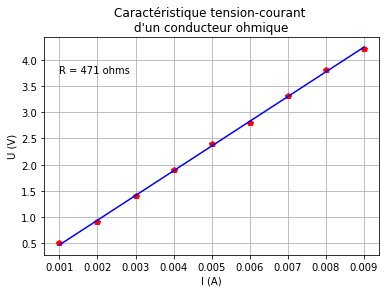

In [3]:
# définition de la fonction modèle
def loi_ohm(I, R):
    """ Loi d'Ohm """
    U = R * I
    return U

# modélisation : recherche des paramètres optimisés du modèle (cf ma doc sur python scientifique)
parametres = curve_fit(loi_ohm, I, U)[0]

R = parametres[0] # il n'y a qu'un seul paramètre dans la modélisation ici
print(f'R = {R} ohms')

# calcul des ordonnées avec la fonction du modèle et les paramètres optimisés
U_model = loi_ohm(I, R)

# tracé des graphes des données à modéliser et de la fonction modèle optimisée
plt.plot(I, U, 'rp') # valeurs expérimentales : points rouges
plt.plot(I, U_model, 'b') # courbe modélisée en bleu

plt.title("Caractéristique tension-courant \nd'un conducteur ohmique")
plt.xlabel('I (A)')
plt.ylabel('U (V)')
plt.text(.001, 3.75, f'R = {R:.0f} ohms')
plt.grid(True)

plt.show()

### On exploite les mesures de tension aux bornes d'une pile de fem E = 4,5 V et de résistance interne r = 4,8 ohms, en fonction de l'intensité I qu'elle débite.

In [4]:
# tension en V
U = np.array([4.5, 4.3, 4, 3.8, 3.5, 3.3, 3, 2.8, 2.6]) 
# intensité en mA
I = np.array([i for i in range(0, 401, 50)])
I = I / 1000 # conversion en A

### La caractéristique de la pile est une fonction affine décroissante : U = E - r I

E = 4.506666667129351 volts ; r = 4.8666666689800895 ohms


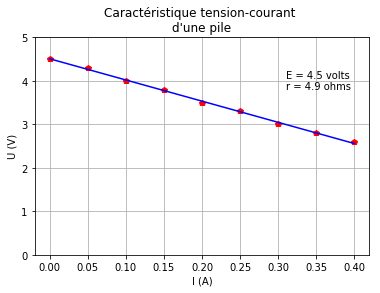

In [5]:
# définition de la fonction caractéristique
def caracteristique_pile(I, E, r):
    """ caractéristique d'une pile : U = E - r.I """
    U = E - r * I
    return U

# modélisation : recherche des paramètres optimisés du modèle
parametres = curve_fit(caracteristique_pile, I, U)[0]

E, r = parametres # il y a deux paramètres dans la modélisation ici
print(f'E = {E} volts ; r = {r} ohms')

# calcul des ordonnées avec la fonction du modèle et les paramètres optimisés
U_model = caracteristique_pile(I, E, r)

# tracé des graphes des données à modéliser et de la fonction modèle optimisée
plt.plot(I, U, 'rp')
plt.plot(I, U_model, color="blue")

plt.title("Caractéristique tension-courant \nd'une pile")
plt.xlabel('I (A)')
plt.ylabel('U (V)')
plt.axis(ymin=0, ymax=5)
plt.text(.31, 3.8, f'E = {E:.1f} volts \nr = {r:.1f} ohms')
plt.grid(True)

plt.show()